In [58]:
%plot --format svg

In [59]:
frLow = 200
frHigh = 2600
bwRadio = frHigh - frLow
costasN = 8
deltaFcostas = bwRadio/costasN

frLow =  200
frHigh =  2600
bwRadio =  2400
costasN =  8
deltaFcostas =  300


In [60]:
BWchannel = 100000
pulseSamples = pow2(ceil(log2(BWchannel * 2/deltaFcostas)))
sampleRate = pulseSamples * deltaFcostas

BWchannel =  100000
pulseSamples =  1024
sampleRate =  307200


In [61]:
costasFreq = deltaFcostas:deltaFcostas:deltaFcostas * costasN

costasFreq =

    300    600    900   1200   1500   1800   2100   2400



In [62]:
costasFreqIdx = [ 1 8 3 6 2 7 5 4 ];

In [108]:
costasFreq2 = [ 300    600    900   1200   1500   1800   2100   2400 ];
TimeCV = [0:1/sampleRate:2/deltaFcostas](:);
RefSigCoreCV = zeros(rows(TimeCV), 1);
for idx = 1:1:columns(costasFreq2)
  RefSigCoreCV = RefSigCoreCV .+ i * exp(i*pi*TimeCV*2*costasFreq2(idx));
endfor
size(TimeCV)
size(RefSigCoreCV)

ans =

   2049      1

ans =

   2049      1



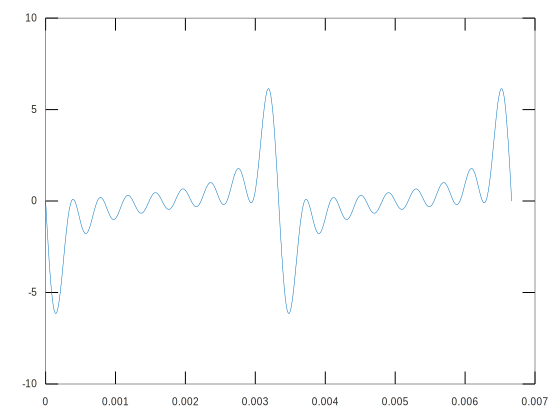

In [109]:
plot(TimeCV, RefSigCoreCV)

In [110]:
# Need raised cosine for sampling subpulse
RaisedCosineCV = (1 - cos(2*pi*TimeCV*deltaFcostas*pulseSamples/(rows(TimeCV)-1)))/2;
size(RaisedCosineCV)

ans =

   2049      1



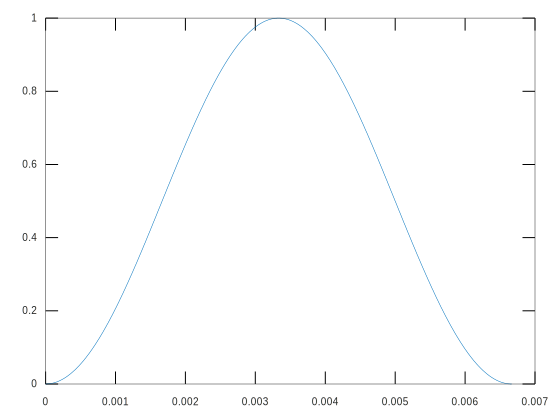

In [111]:
plot(TimeCV, RaisedCosineCV)

In [112]:
freqOvr = 2; # Must be a power of 2
SigLoopCV = [RefSigCoreCV .* RaisedCosineCV](1:end-1);
tic
FftLoopCV = fftshift(fft(SigLoopCV, rows(SigLoopCV)*freqOvr+1));
toc
FreqLoopCV = linspace(-sampleRate/2, sampleRate/2, rows(FftLoopCV));

Elapsed time is 0.0094831 seconds.


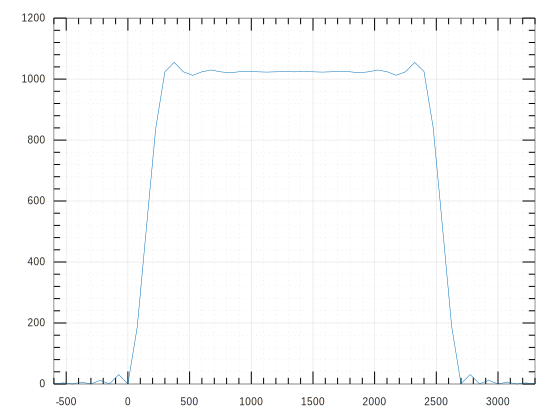

In [113]:
plot(FreqLoopCV, abs(FftLoopCV))
grid on
grid minor
axis([-600 +3300], "tic")

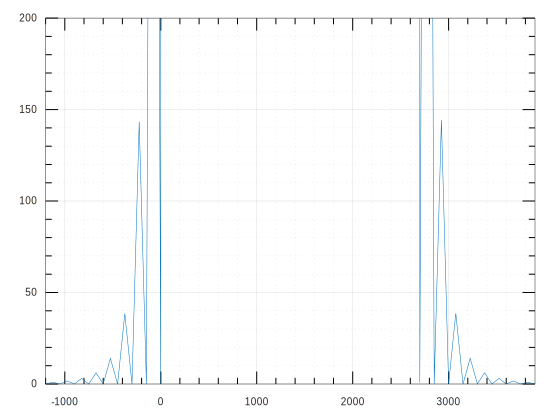

In [114]:
E = FftLoopCV .* conj(FftLoopCV);
plot(FreqLoopCV, E)
grid on
grid minor
axis([-1200 +3900 0 200], "tic")

In [115]:
pkg load signal
[PeaksCV idxPeaksCV] = findpeaks(E, "MinPeakHeight", 4)


PeaksCV =

   6.1345e+00
   1.3993e+01
   3.8474e+01
   1.4344e+02
   9.6024e+02
   1.1128e+06
   1.0607e+06
   1.0525e+06
   1.0492e+06
   1.0492e+06
   1.0525e+06
   1.0607e+06
   1.1124e+06
   9.7022e+02
   1.4438e+02
   3.8658e+01
   1.4045e+01
   6.1531e+00

idxPeaksCV =

   2040
   2042
   2044
   2046
   2048
   2054
   2058
   2062
   2066
   2068
   2072
   2076
   2080
   2086
   2088
   2090
   2092
   2094



In [116]:
FreqLoopCV(idxPeaksCV)

ans =

 Columns 1 through 11:

   -675   -525   -375   -225    -75    375    675    975   1275   1425   1725

 Columns 12 through 18:

   2025   2325   2775   2925   3075   3225   3375



In [117]:
10*(log(PeaksCV)-log(max(PeaksCV)))

ans =

  -121.08445
  -112.83818
  -102.72386
   -89.56456
   -70.55190
     0.00000
    -0.47942
    -0.55688
    -0.58811
    -0.58816
    -0.55697
    -0.47974
    -0.00313
   -70.44855
   -89.49919
  -102.67632
  -112.80105
  -121.05416



In [118]:
7/300


ans =  0.023333


In [119]:
1/300

ans =  0.0033333
